### Load the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')

### Let's take a quick look at the Data

In [3]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5528 entries, 0 to 5527
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   R_fighter     4240 non-null   object 
 1   B_fighter     4240 non-null   object 
 2   R_odds        4240 non-null   float64
 3   B_odds        4240 non-null   float64
 4   date          4240 non-null   object 
 5   location      4240 non-null   object 
 6   country       4240 non-null   object 
 7   Winner        4240 non-null   object 
 8   title_bout    4240 non-null   object 
 9   weight_class  4240 non-null   object 
 10  gender        4240 non-null   object 
dtypes: float64(2), object(9)
memory usage: 475.2+ KB


### Let's convert 'date' to datetime

In [4]:
df['date'] = pd.to_datetime(df['date'])

### Let's remove any blank data

In [5]:
df = df.dropna()

In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4240 entries, 0 to 4239
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   R_fighter     4240 non-null   object        
 1   B_fighter     4240 non-null   object        
 2   R_odds        4240 non-null   float64       
 3   B_odds        4240 non-null   float64       
 4   date          4240 non-null   datetime64[ns]
 5   location      4240 non-null   object        
 6   country       4240 non-null   object        
 7   Winner        4240 non-null   object        
 8   title_bout    4240 non-null   object        
 9   weight_class  4240 non-null   object        
 10  gender        4240 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 397.5+ KB


### Let's take a peek at all of the features

In [7]:
df[['R_fighter', 'B_fighter']].describe()

,R_fighter,B_fighter
count,4240,4240
unique,1217,1400
top,Donald Cerrone,Charles Oliveira
freq,23,18


#### We can see that Donal Cerrone and Charles Oliveira have fought in a lot of fights, but we won't be sure of how many until we can combine both columns in some way since fighters can appear in both columns
***

In [8]:
df['date'].describe()

count                    4240
unique                    362
top       2016-11-19 00:00:00
freq                       25
first     2010-03-21 00:00:00
last      2020-03-14 00:00:00
Name: date, dtype: object

#### From the date column we can see that the first fight we are looking at occurred on March 21st, 2010.  The most recent fight occurred on March 14, 2020.  So we are looking at fights over a ten year period
***

In [9]:
df[['R_odds', 'B_odds']].describe()

,R_odds,B_odds
count,4240.000000,4240.000000
mean,-118.092217,68.525708
std,272.796068,252.371462
min,-1700.000000,-1200.000000
25%,-256.250000,-145.000000
50%,-150.000000,130.000000
75%,130.000000,225.000000
max,775.000000,1300.000000


#### From the odds column we can see the largest favorite was -1700.  The largest underdog was +1300
***

In [10]:
df['location'].describe()

count                       4240
unique                       144
top       Las Vegas, Nevada, USA
freq                         764
Name: location, dtype: object

#### Las Vegas has had the most fights, although fights have taken place in 144 different locations
***

In [11]:
print(df['country'].describe())
print()
print(df['country'].unique())

count     4240
unique      27
top        USA
freq      2491
Name: country, dtype: object

['Brazil' 'USA' ' USA' ' New Zealand' ' Canada' ' Uruguay' ' China'
 ' United Arab Emirates' ' Mexico' ' Denmark' ' Australia' ' Singapore'
 ' Russia' ' Brazil' ' South Korea' ' Sweden' ' United Kingdom'
 ' Czech Republic' ' Argentina' ' Germany' ' Chile' ' Poland' ' Japan'
 ' Netherlands' ' Croatia' ' Ireland' ' Philippines']


#### Fights have taken place in 27 different countries.  Over half of them have occurred in the USA.

In [12]:
print(df['Winner'].describe())
print()
print(df['Winner'].unique())

count     4240
unique       3
top        Red
freq      2430
Name: Winner, dtype: object

['Blue' 'Red' 'Draw']


#### Red has won 2430 / 4240 fights.  The three values of 'Winner' are 'Red', 'Blue', or 'Draw'
***

In [13]:
print(df['title_bout'].describe())

count      4240
unique        2
top       False
freq       4026
Name: title_bout, dtype: object


#### 4026 out of 4240 fights have NOT been title fights
***

In [14]:
print(df['weight_class'].describe())
print()
print(df['weight_class'].unique())

count            4240
unique             13
top       Lightweight
freq              786
Name: weight_class, dtype: object

['Lightweight' 'Welterweight' 'Light Heavyweight' 'Flyweight'
 "Women's Strawweight" 'Bantamweight' "Women's Flyweight"
 "Women's Bantamweight" 'Middleweight' 'Featherweight'
 "Women's Featherweight" 'Heavyweight' 'Catch Weight']


#### There are 13 weight classes covering the men and women's divisions.  'Lightweight' has had the most fights
***

In [15]:
print(df['gender'].describe())

count     4240
unique       2
top       MALE
freq      3854
Name: gender, dtype: object


#### 3854 of the 4240 fights have been in the male divisions
***

### Fights by Year

#### We know the first year is 2010, and the most recent year is 2020

In [16]:
year_labels = []
for z in range(2010, 2021):
    year_labels.append(z)
    
fight_counts = []
for z in (year_labels):
    fight_counts.append(len(df[df['date'].dt.year==z]))
    
    
    

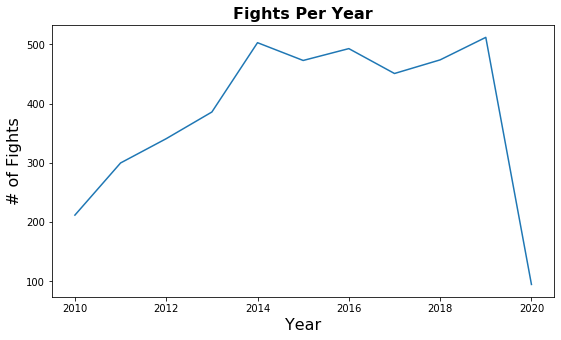

In [17]:
plt.figure(figsize=(9,5))
plt.plot(year_labels, fight_counts)
plt.xlabel('Year', fontsize=16)
plt.ylabel('# of Fights', fontsize=16)
plt.title('Fights Per Year', fontweight='bold', fontsize=16)
plt.show()

#### Since about 2014 there have been around 400 to 500 fights per year.
***

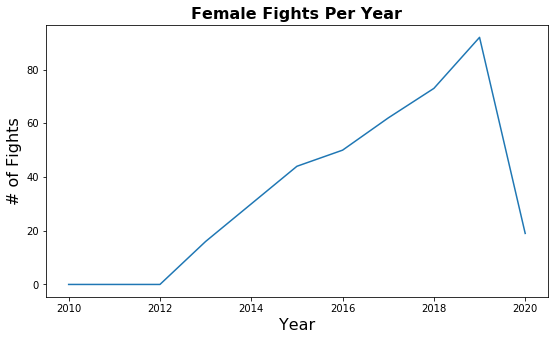

In [18]:
female_fight_counts = []
for z in (year_labels):
    female_fight_counts.append(len(df[(df['date'].dt.year==z) & (df['gender']=='FEMALE')])) 
#print(female_fight_counts)

plt.figure(figsize=(9,5))
plt.plot(year_labels, female_fight_counts)
plt.xlabel('Year', fontsize=16)
plt.ylabel('# of Fights', fontsize=16)
plt.title('Female Fights Per Year', fontweight='bold', fontsize=16)
plt.show()

#### The first female fight occurred in 2013 and the number of female fights has consistently risen year-by-year
***

### Let's add an underdog column to the original dataframe.  This will be helpful going forward

In [19]:
df['underdog'] = ''

red_underdog_mask = df['R_odds'] > df['B_odds']
#print(red_underdog_mask)
#print()

blue_underdog_mask = df['B_odds'] > df['R_odds']
#print(blue_underdog_mask)
#print()

even_mask = df['B_odds'] == df['R_odds']
#print(even_mask)
#print()

df['underdog'][red_underdog_mask] = 'Red'
df['underdog'][blue_underdog_mask] = 'Blue'
df['underdog'][even_mask] = 'Even'




D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### How common are upsets?

Let's explore how common upsets are.  First let's remove fights where the fighters are even from the dataframe.  We will also remove fights that end in a draw.  This should not be a very large number.

In [20]:
df_no_even = df[df['underdog'] != 'Even']
df_no_even = df_no_even[df_no_even['Winner'] != 'Draw']
print(f"Number of fights including even fights and draws: {len(df)}")
print(f"Number of fights with even fights and draws removed: {len(df_no_even)}")

Number of fights including even fights and draws: 4240
Number of fights with even fights and draws removed: 4088


In [21]:
number_of_fights = len(df_no_even)
number_of_upsets = len(df_no_even[df_no_even['Winner'] == df_no_even['underdog']])
number_of_favorites = len(df_no_even[df_no_even['Winner'] != df_no_even['underdog']])
#print(number_of_upsets)
#print(number_of_fights)
#print(number_of_favorites)

In [22]:
upset_percent = (number_of_upsets / number_of_fights) * 100
favorite_percent = (number_of_favorites / number_of_fights) * 100
#print(upset_percent)
#print(favorite_percent)

([<matplotlib.patches.Wedge at 0x20e5d684cc8>,
 [Text(-0.5157387396972825, 0.9716035983751083, 'Favorites'),
  Text(0.5157389216334618, -0.9716035018011998, 'Underdogs')],
 [Text(-0.28131203983488134, 0.5299655991136953, '65.5%'),
  Text(0.2813121390727973, -0.529965546437018, '34.5%')])

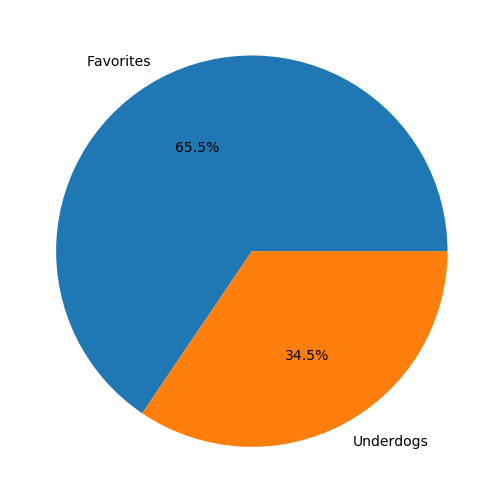

In [23]:
labels = 'Favorites', 'Underdogs'
sizes = [favorite_percent, upset_percent]
fig1, ax1 = plt.subplots(figsize=(9,9))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 14})

Favorites win about 65.5% of the time.  Let's take a deeper dive into this information.
***

#### How does the upset rate vary by year?

In [24]:
year_labels
year_fight_counts = []
year_upset_counts = []
year_upset_percent = []

for y in year_labels:
    temp_fights = df_no_even[df_no_even['date'].dt.year==y]
    temp_upsets = temp_fights[temp_fights['Winner'] == temp_fights['underdog']]
    year_fight_counts.append(len(temp_fights))
    year_upset_counts.append(len(temp_upsets))
    year_upset_percent.append(len(temp_upsets)/len(temp_fights))
    
#print(year_fight_counts)
#print()
#print(year_upset_counts)
#print()
#print(year_upset_percent)

year_upset_percent = [x*100 for x in year_upset_percent]

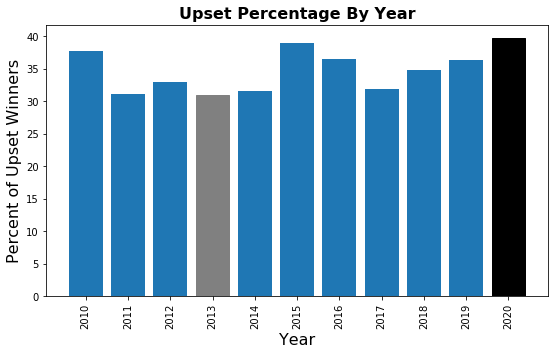

In [25]:
plt.figure(figsize=(9,5))
barlist = plt.bar(year_labels, year_upset_percent)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Percent of Upset Winners", fontsize=16)
plt.xticks(year_labels, rotation=90)
plt.title('Upset Percentage By Year', fontweight='bold', fontsize=16)
barlist[10].set_color('black')
barlist[3].set_color('grey')

Text(0.5, 1, 'Underdog Winning Percentage by Year')

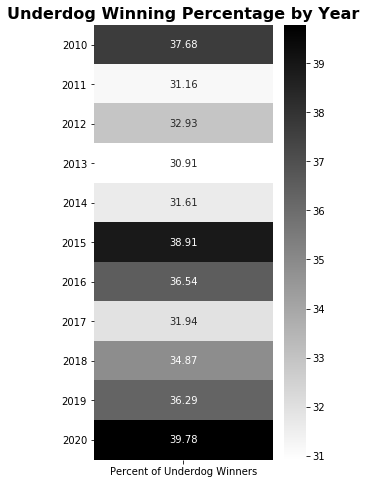

In [26]:
temp_df = pd.DataFrame({"Percent of Underdog Winners": year_upset_percent},
                      index=year_labels)

fig, ax = plt.subplots(figsize=(4,8))
sns.heatmap(temp_df, annot=True, fmt=".4g", cmap='binary', ax=ax)
plt.yticks(rotation=0)
plt.title("Underdog Winning Percentage by Year", fontsize=16, fontweight='bold')


Underdogs win between 30.9% and 39.8%.  The best year for underdogs is 2020 so far.  The worst year was 2013.
***

#### How do upsets vary by weight class?

In [27]:
weight_class_list = df['weight_class'].unique()
wc_fight_counts = []
wc_upset_counts = []
wc_upset_percent = []

for wc in weight_class_list:
    temp_fights = df_no_even[df_no_even['weight_class']==wc]
    temp_upsets = temp_fights[temp_fights['Winner'] == temp_fights['underdog']]
    wc_fight_counts.append(len(temp_fights))
    wc_upset_counts.append(len(temp_upsets))
    wc_upset_percent.append(len(temp_upsets)/len(temp_fights))

#print(weight_class_list)
#print()
#print(wc_fight_counts)
#print()
#print(wc_upset_counts)
#print()
wc_upset_percent = [x*100 for x in wc_upset_percent]    
print(wc_upset_percent)


[31.36482939632546, 35.82295988934993, 34.226190476190474, 33.5, 31.61290322580645, 33.415233415233416, 39.473684210526315, 35.714285714285715, 36.74698795180723, 36.69527896995708, 28.57142857142857, 33.980582524271846, 37.5]


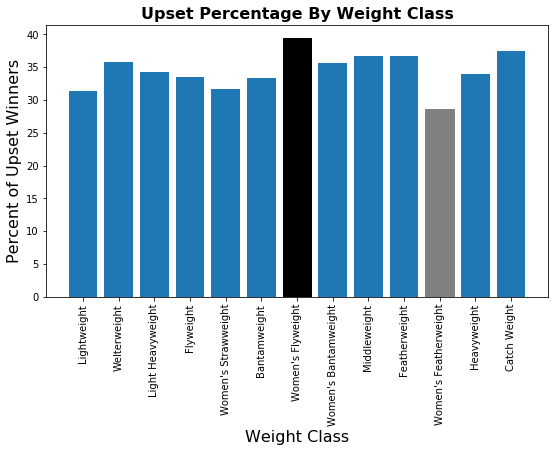

In [28]:
plt.figure(figsize=(9,5))
barlist = plt.bar(weight_class_list, wc_upset_percent)
plt.xlabel("Weight Class", fontsize=16)
plt.ylabel("Percent of Upset Winners", fontsize=16)
plt.xticks(weight_class_list, rotation=90)
plt.title('Upset Percentage By Weight Class', fontweight='bold', fontsize=16)
barlist[6].set_color('black')
barlist[10].set_color('grey')

Text(0.5, 1, 'Underdog Winning Percentage by Weight Class')

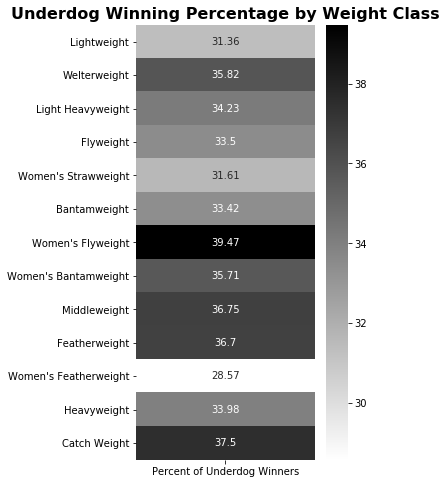

In [29]:
temp_df = pd.DataFrame({"Percent of Underdog Winners": wc_upset_percent},
                      index=weight_class_list)

fig, ax = plt.subplots(figsize=(4,8))
sns.heatmap(temp_df, annot=True, fmt=".4g", cmap='binary', ax=ax)
plt.yticks(rotation=0)
plt.title("Underdog Winning Percentage by Weight Class", fontsize=16, fontweight='bold')


Upset Percentage varies from 28.6% for Women's Featherweight to 39.5% for Women's Flyweight.
***

#### How do Upsets vary by Gender?

In [30]:
gender_list = df['gender'].unique()
gender_fight_counts = []
gender_upset_counts = []
gender_upset_percent = []

for g in gender_list:
    temp_fights = df_no_even[df_no_even['gender']==g]
    temp_upsets = temp_fights[temp_fights['Winner'] == temp_fights['underdog']]
    gender_fight_counts.append(len(temp_fights))
    gender_upset_counts.append(len(temp_upsets))
    gender_upset_percent.append(len(temp_upsets)/len(temp_fights))

#print(gender_list)
#print()
#print(gender_fight_counts)
#print()
#print(gender_upset_counts)
#print()
#gender_upset_percent = [x*100 for x in gender_upset_percent]    
#print(gender_upset_percent)

Text(0.5, 1.0, 'Upset Percentage By Gender')

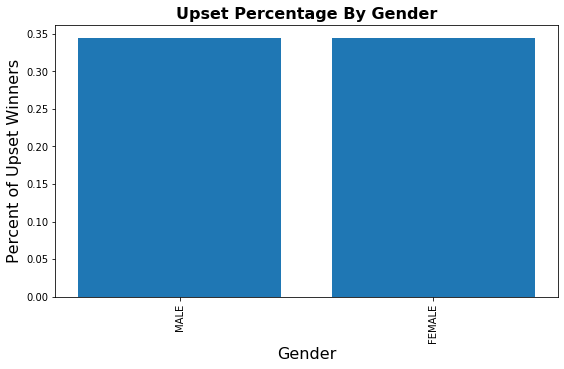

In [31]:
plt.figure(figsize=(9,5))
barlist = plt.bar(gender_list, gender_upset_percent)
plt.xlabel("Gender", fontsize=16)
plt.ylabel("Percent of Upset Winners", fontsize=16)
plt.xticks(gender_list, rotation=90)
plt.title('Upset Percentage By Gender', fontweight='bold', fontsize=16)

The upset percentage for male and females is almost identical.  Male underdogs win 34.46% of the time.  Female underdogs win 34.50% of the time.
***

#### Are upsets more common in title fights?

In [44]:
title_list = df['title_bout'].unique()
title_fight_counts = []
title_upset_counts = []
title_upset_percent = []

for t in title_list:
    temp_fights = df_no_even[df_no_even['title_bout']==t]
    temp_upsets = temp_fights[temp_fights['Winner'] == temp_fights['underdog']]
    title_fight_counts.append(len(temp_fights))
    title_upset_counts.append(len(temp_upsets))
    title_upset_percent.append(len(temp_upsets)/len(temp_fights))
    
#print(title_list)
#print()
#print(title_fight_counts)
#print()
#print(title_upset_counts)
#print()
#title_upset_percent = [x*100 for x in title_upset_percent]    
print(title_upset_percent)    

[0.3458762886597938, 0.32211538461538464]


Text(0.5, 1.0, 'Upset Percentage By Title Bout')

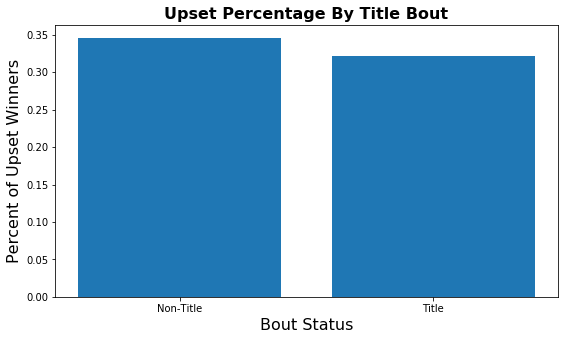

In [46]:
plt.figure(figsize=(9,5))
barlist = plt.bar(['Non-Title', 'Title'], title_upset_percent)
plt.xlabel("Bout Status", fontsize=16)
plt.ylabel("Percent of Upset Winners", fontsize=16)
plt.xticks(['Non-Title', 'Title'])
plt.title('Upset Percentage By Title Bout', fontweight='bold', fontsize=16)

Upsets are slightly more likely in non-title bouts.  They occur 34.6% of the time compared to 32.2% of the time in title fights
***

#### Are upsets more likely in certain weight class title bouts?

Here we are starting to stray into an area where sample sizes may be too small for some weight classes.  I still think this is worth exploring though to see if any anomalies stand out.

In [49]:
df_title = df_no_even[df_no_even['title_bout']==True]
weight_class_list = df_title['weight_class'].unique()
wc_fight_counts = []
wc_upset_counts = []
wc_upset_percent = []

for wc in weight_class_list:
    temp_fights = df_title[df_title['weight_class']==wc]
    temp_upsets = temp_fights[temp_fights['Winner'] == temp_fights['underdog']]
    wc_fight_counts.append(len(temp_fights))
    wc_upset_counts.append(len(temp_upsets))
    wc_upset_percent.append(len(temp_upsets)/len(temp_fights))

print(weight_class_list)
print()
print(wc_fight_counts)
print()
print(wc_upset_counts)
print()
wc_upset_percent = [x*100 for x in wc_upset_percent]    
print(wc_upset_percent)


['Middleweight' "Women's Strawweight" 'Flyweight' 'Light Heavyweight'
 "Women's Bantamweight" 'Featherweight' "Women's Flyweight" 'Heavyweight'
 'Lightweight' 'Welterweight' 'Bantamweight' "Women's Featherweight"]

[24, 11, 15, 21, 15, 20, 5, 19, 26, 27, 19, 6]

[8, 3, 4, 3, 4, 5, 0, 9, 11, 10, 8, 2]

[33.33333333333333, 27.27272727272727, 26.666666666666668, 14.285714285714285, 26.666666666666668, 25.0, 0.0, 47.368421052631575, 42.30769230769231, 37.03703703703704, 42.10526315789473, 33.33333333333333]


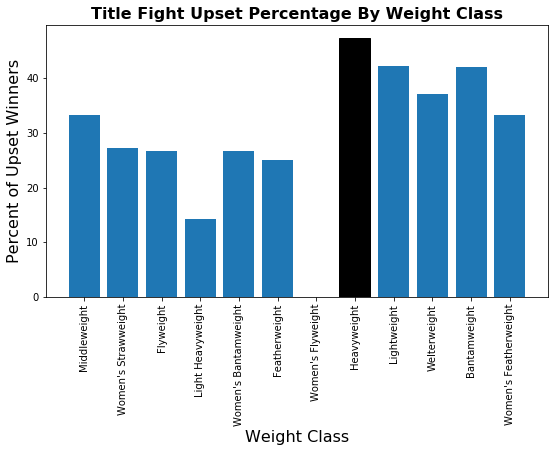

In [53]:
plt.figure(figsize=(9,5))
barlist = plt.bar(weight_class_list, wc_upset_percent)
plt.xlabel("Weight Class", fontsize=16)
plt.ylabel("Percent of Upset Winners", fontsize=16)
plt.xticks(weight_class_list, rotation=90)
plt.title('Title Fight Upset Percentage By Weight Class', fontweight='bold', fontsize=16)
barlist[7].set_color('black')

(array([0.5, 1.5]), <a list of 2 Text xticklabel objects>)

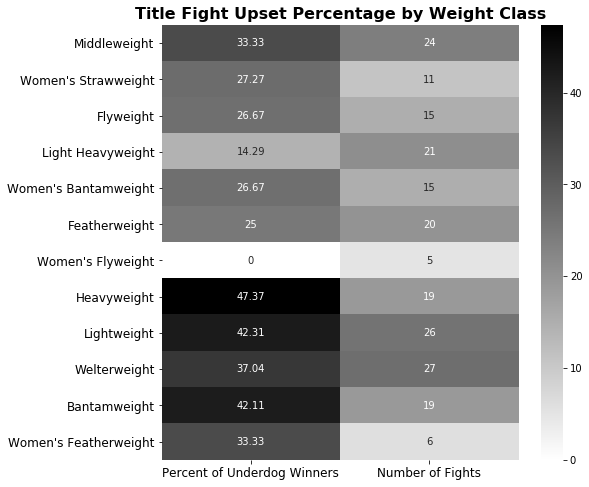

In [60]:
temp_df = pd.DataFrame({"Percent of Underdog Winners": wc_upset_percent, 
                        "Number of Fights": wc_fight_counts},
                      index=weight_class_list)

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(temp_df, annot=True, fmt=".4g", cmap='binary', ax=ax)
plt.yticks(rotation=0, fontsize=12)
plt.title("Title Fight Upset Percentage by Weight Class", fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)

In the five title fights in UFC Women's Flyweight history there has never been an upset.  Out of 19 title fights in heavyweight history 47.37% of them have been won by the underdog.
***

### Who has the most upsets since 2010?

In [71]:
red_fighter_list = df_no_even['R_fighter'].unique()
blue_fighter_list = df_no_even['B_fighter'].unique()
fighter_list = list(set(red_fighter_list) | set(blue_fighter_list))
upset_list = []

for f in fighter_list:
    temp_fights = df_no_even[(df_no_even['R_fighter']==f) | (df_no_even["B_fighter"]==f)]
    temp_upset_count = 0
    temp_fights
    #print(temp_fights)
    #print(f"{f}: {len(temp_fights)}")
    #temp_upsets = temp_fights[temp_fights['Winner'] == temp_fights['underdog']]
    #wc_fight_counts.append(len(temp_fights))
    #wc_upset_counts.append(len(temp_upsets))
    #wc_upset_percent.append(len(temp_upsets)/len(temp_fights))
    

             R_fighter         B_fighter  R_odds  B_odds       date  \
2350  Alptekin Ozkilic        Ben Nguyen  -230.0   190.0 2015-05-09   
2730      John Lineker  Alptekin Ozkilic  -345.0   315.0 2014-07-16   
2988  Alptekin Ozkilic      Louis Smolka  -270.0   248.0 2014-01-15   
3022  Darren Uyenoyama  Alptekin Ozkilic   210.0  -230.0 2013-12-14   

                                  location     country Winner title_bout  \
2350  Adelaide, South Australia, Australia   Australia   Blue      False   
2730        Atlantic City, New Jersey, USA         USA    Red      False   
2988                  Duluth, Georgia, USA         USA   Blue      False   
3022           Sacramento, California, USA         USA   Blue      False   

     weight_class gender underdog  
2350    Flyweight   MALE     Blue  
2730    Flyweight   MALE     Blue  
2988    Flyweight   MALE     Blue  
3022    Flyweight   MALE      Red  
             R_fighter         B_fighter  R_odds  B_odds       date  \
2249  Darrel

          R_fighter      B_fighter  R_odds  B_odds       date  \
983   Danny Roberts  Oliver Enkamp  -130.0   110.0 2018-03-17   
1382  Oliver Enkamp  Nordine Taleb   275.0  -335.0 2017-05-28   

                             location          country Winner title_bout  \
983   London, England, United Kingdom   United Kingdom    Red      False   
1382                Stockholm, Sweden           Sweden   Blue      False   

      weight_class gender underdog  
983   Welterweight   MALE     Blue  
1382  Welterweight   MALE      Red  
           R_fighter       B_fighter  R_odds  B_odds       date  \
1569  Corey Anderson  Sean O'Connell  -400.0   325.0 2016-12-09   
1828     Steve Bosse  Sean O'Connell  -135.0   115.0 2016-06-18   
2009     Ilir Latifi  Sean O'Connell  -265.0   245.0 2016-01-17   
2341  Anthony Perosh  Sean O'Connell  -130.0   120.0 2015-05-09   
2485  Matt Van Buren  Sean O'Connell   215.0  -235.0 2015-01-18   
2778   Gian Villante  Sean O'Connell  -265.0   245.0 2014-06-2

1668   MALE     Blue  
       R_fighter        B_fighter  R_odds  B_odds       date  \
254  Bevon Lewis  Dequan Townsend  -370.0   310.0 2020-01-25   
394  Bevon Lewis   Darren Stewart  -170.0   150.0 2019-06-08   
617   Uriah Hall      Bevon Lewis   150.0  -170.0 2018-12-29   

                         location country Winner title_bout  weight_class  \
254  Raleigh, North Carolina, USA     USA    Red      False  Middleweight   
394        Chicago, Illinois, USA     USA   Blue      False  Middleweight   
617  Los Angeles, California, USA     USA    Red      False  Middleweight   

    gender underdog  
254   MALE     Blue  
394   MALE     Blue  
617   MALE      Red  
           R_fighter      B_fighter  R_odds  B_odds       date  \
326  Shamil Gamzatov  Klidson Abreu  -145.0   125.0 2019-11-09   

                   location  country Winner title_bout       weight_class  \
326  Moscow, Moscow, Russia   Russia    Red      False  Light Heavyweight   

    gender underdog  
326   MALE   

                R_fighter             B_fighter  R_odds  B_odds       date  \
161            Ciryl Gane  Raphael Pessoa Nunes  -470.0   375.0 2019-08-10   
297  Raphael Pessoa Nunes           Jeff Hughes   205.0  -245.0 2019-10-26   

                location     country Winner title_bout weight_class gender  \
161  Montevideo, Uruguay     Uruguay    Red      False  Heavyweight   MALE   
297   Kallang, Singapore   Singapore    Red      False  Heavyweight   MALE   

    underdog  
161     Blue  
297      Red  
             R_fighter    B_fighter  R_odds  B_odds       date  \
2830  Chris Holdsworth  Chico Camus  -355.0   320.0 2014-05-24   
3036  Chris Holdsworth  Davey Grant  -200.0   185.0 2013-11-30   

                    location country Winner title_bout  weight_class gender  \
2830  Las Vegas, Nevada, USA     USA    Red      False  Bantamweight   MALE   
3036  Las Vegas, Nevada, USA     USA    Red       True  Bantamweight   MALE   

     underdog  
2830     Blue  
3036     Blue  


3374  Middleweight   MALE     Blue  
                R_fighter            B_fighter  R_odds  B_odds       date  \
3450  Yasuhiro Urushitani         John Lineker   195.0  -215.0 2012-11-10   
3656     Joseph Benavidez  Yasuhiro Urushitani  -870.0   680.0 2012-03-02   

                                location     country Winner title_bout  \
3450                        Macau, China       China   Blue      False   
3656  Sydney, New South Wales, Australia   Australia    Red      False   

     weight_class gender underdog  
3450    Flyweight   MALE      Red  
3656    Flyweight   MALE     Blue  
                R_fighter        B_fighter  R_odds  B_odds       date  \
704        Joseph Morales     Eric Shelton   125.0  -145.0 2018-11-10   
1046  Deiveson Figueiredo   Joseph Morales   110.0  -130.0 2018-02-03   
1275       Joseph Morales  Roberto Sanchez   100.0  -120.0 2017-08-05   

                                   location  country Winner title_bout  \
704                   Denver, Col

    R_fighter         B_fighter  R_odds  B_odds       date  \
88  Tim Means  Daniel Rodriguez  -345.0   285.0 2020-02-15   

                       location country Winner title_bout  weight_class  \
88  Rio Rancho, New Mexico, USA     USA   Blue      False  Welterweight   

   gender underdog  
88   MALE     Blue  
           R_fighter       B_fighter  R_odds  B_odds       date  \
175   Manny Bermudez    Casey Kenney  -170.0   150.0 2019-08-17   
280     Charles Rosa  Manny Bermudez   160.0  -185.0 2019-10-18   
565     Benito Lopez  Manny Bermudez   170.0  -200.0 2019-02-17   
830      Davey Grant  Manny Bermudez   260.0  -320.0 2018-07-22   
1011  Albert Morales  Manny Bermudez   155.0  -175.0 2018-02-24   

                        location   country Winner title_bout   weight_class  \
175     Anaheim, California, USA       USA   Blue      False   Catch Weight   
280   Boston, Massachusetts, USA       USA    Red      False  Featherweight   
565        Phoenix, Arizona, USA       USA

              R_fighter       B_fighter  R_odds  B_odds       date  \
766        Adam Yandiev  Jordan Johnson   240.0  -280.0 2018-09-15   
999      Jordan Johnson   Adam Milstead  -255.0   215.0 2018-03-03   
1329     Jordan Johnson  Marcel Fortuna  -190.0   165.0 2017-07-07   
1515  Henrique da Silva  Jordan Johnson   165.0  -190.0 2017-01-28   

                    location  country Winner title_bout       weight_class  \
766   Moscow, Moscow, Russia   Russia   Blue      False       Middleweight   
999   Las Vegas, Nevada, USA      USA    Red      False  Light Heavyweight   
1329  Las Vegas, Nevada, USA      USA    Red      False  Light Heavyweight   
1515   Denver, Colorado, USA      USA   Blue      False  Light Heavyweight   

     gender underdog  
766    MALE      Red  
999    MALE     Blue  
1329   MALE     Blue  
1515   MALE      Red  
           R_fighter      B_fighter  R_odds  B_odds       date  \
159  Enrique Barzola  Bobby Moffett  -165.0   145.0 2019-08-10   
502   Bryce

3065      False  Lightweight   MALE      Red  
          R_fighter       B_fighter  R_odds  B_odds       date  \
264  Mackenzie Dern    Amanda Ribas  -185.0   160.0 2019-10-12   
933  Mackenzie Dern   Amanda Cooper  -260.0   220.0 2018-05-12   
993    Ashley Yoder  Mackenzie Dern   390.0  -490.0 2018-03-03   

                                   location  country Winner title_bout  \
264                     Tampa, Florida, USA      USA   Blue      False   
933  Rio de Janeiro, Rio de Janeiro, Brazil   Brazil    Red      False   
993                  Las Vegas, Nevada, USA      USA   Blue      False   

            weight_class  gender underdog  
264  Women's Strawweight  FEMALE     Blue  
933  Women's Strawweight  FEMALE     Blue  
993  Women's Strawweight  FEMALE      Red  
        R_fighter      B_fighter  R_odds  B_odds       date  \
4003  Paul Taylor  Gabe Ruediger  -220.0   180.0 2011-02-05   
4118   Joe Lauzon  Gabe Ruediger  -320.0   290.0 2010-08-28   

                        l

3645  Welterweight   MALE     Blue  
              R_fighter      B_fighter  R_odds  B_odds       date  \
2222        Ilir Latifi  Hans Stringer  -235.0   195.0 2015-07-18   
2590    Fabio Maldonado  Hans Stringer  -130.0   120.0 2014-10-25   
2901  Francimar Barroso  Hans Stringer  -135.0   125.0 2014-03-23   

                                location          country Winner title_bout  \
2222   Glasgow, Scotland, United Kingdom   United Kingdom    Red      False   
2590              Rio de Janeiro, Brazil           Brazil    Red      False   
2901  Natal, Rio Grande do Norte, Brazil           Brazil   Blue      False   

           weight_class gender underdog  
2222  Light Heavyweight   MALE     Blue  
2590  Light Heavyweight   MALE     Blue  
2901  Light Heavyweight   MALE     Blue  
             R_fighter             B_fighter  R_odds  B_odds       date  \
785   Jake Ellenberger       Bryan Barberena   335.0  -420.0 2018-08-25   
898   Jake Ellenberger          Ben Saunders  -160.

                 R_fighter       B_fighter  R_odds  B_odds       date  \
73          Jan Blachowicz   Luke Rockhold   220.0  -260.0 2019-07-06   
82          Corey Anderson  Jan Blachowicz  -235.0   195.0 2020-02-15   
334         Jan Blachowicz    Jacare Souza  -160.0   140.0 2019-11-16   
545         Jan Blachowicz   Thiago Santos   110.0  -130.0 2019-02-23   
758         Jan Blachowicz   Nikita Krylov   125.0  -145.0 2018-09-15   
979            Jimi Manuwa  Jan Blachowicz  -150.0   130.0 2018-03-17   
1095       Jared Cannonier  Jan Blachowicz  -190.0   165.0 2017-12-16   
1202        Jan Blachowicz     Devin Clark   130.0  -150.0 2017-10-21   
1436       Patrick Cummins  Jan Blachowicz  -105.0  -115.0 2017-04-08   
1712  Alexander Gustafsson  Jan Blachowicz  -700.0   500.0 2016-09-03   
1916         Igor Pokrajac  Jan Blachowicz   280.0  -340.0 2016-04-10   
2157        Jan Blachowicz  Corey Anderson  -105.0  -115.0 2015-09-05   
2375           Jimi Manuwa  Jan Blachowicz   100.0 

             R_fighter        B_fighter  R_odds  B_odds       date  \
3151     Carlos Condit  Martin Kampmann  -280.0   255.0 2013-08-28   
3432   Johny Hendricks  Martin Kampmann  -167.0   157.0 2012-11-17   
3585  Jake Ellenberger  Martin Kampmann  -178.0   167.0 2012-06-01   
3655      Thiago Alves  Martin Kampmann  -145.0   135.0 2012-03-02   
3763        Rick Story  Martin Kampmann  -110.0   100.0 2011-11-19   
3972     Diego Sanchez  Martin Kampmann   125.0  -135.0 2011-03-03   
4072      Jake Shields  Martin Kampmann  -170.0   160.0 2010-10-23   
4167      Paulo Thiago  Martin Kampmann  -218.0   198.0 2010-06-12   

                                 location     country Winner title_bout  \
3151           Indianapolis, Indiana, USA         USA    Red      False   
3432             Montreal, Quebec, Canada      Canada    Red      False   
3585               Las Vegas, Nevada, USA         USA   Blue      False   
3655   Sydney, New South Wales, Australia   Australia   Blue      Fal

406  Women's Bantamweight  FEMALE     Blue  
          R_fighter      B_fighter  R_odds  B_odds       date  \
403   Tonya Evinger  Lina Lansberg  -400.0   325.0 2019-06-01   
738      Aspen Ladd  Tonya Evinger  -185.0   160.0 2018-10-06   
1279    Cris Cyborg  Tonya Evinger -1250.0   800.0 2017-07-29   

                      location  country Winner title_bout  \
403          Stockholm, Sweden   Sweden   Blue      False   
738     Las Vegas, Nevada, USA      USA    Red      False   
1279  Anaheim, California, USA      USA    Red       True   

               weight_class  gender underdog  
403    Women's Bantamweight  FEMALE     Blue  
738    Women's Bantamweight  FEMALE     Blue  
1279  Women's Featherweight  FEMALE     Blue  
        R_fighter    B_fighter  R_odds  B_odds       date  \
4100  Steve Lopez  Waylon Lowe   140.0  -160.0 2010-09-25   

                        location country Winner title_bout weight_class  \
4100  Indianapolis, Indiana, USA     USA   Blue      False  Lig

260   MALE      Red  
                  R_fighter       B_fighter  R_odds  B_odds       date  \
282           Kyle Bochniak    Sean Woodson  -115.0  -105.0 2019-10-18   
635           Hakeem Dawodu   Kyle Bochniak  -200.0   170.0 2018-12-08   
972   Zabit Magomedsharipov   Kyle Bochniak  -700.0   500.0 2018-04-07   
1064          Kyle Bochniak   Brandon Davis   120.0  -140.0 2018-01-20   
1297          Kyle Bochniak  Jeremy Kennedy   245.0  -290.0 2017-07-22   
1727        Enrique Barzola   Kyle Bochniak   115.0  -135.0 2016-08-27   
2010           Charles Rosa   Kyle Bochniak  -255.0   215.0 2016-01-17   

                                 location  country Winner title_bout  \
282            Boston, Massachusetts, USA      USA   Blue      False   
635              Toronto, Ontario, Canada   Canada    Red      False   
972               Brooklyn, New York, USA      USA    Red      False   
1064           Boston, Massachusetts, USA      USA    Red      False   
1297             Uniondal

           R_fighter       B_fighter  R_odds  B_odds       date  \
224  Caludio Puelles  Marcos Mariano  -400.0   325.0 2019-09-21   
571    Lando Vannata  Marcos Mariano  -450.0   360.0 2019-02-09   

                                  location     country Winner title_bout  \
224  Mexico City, Distrito Federal, Mexico      Mexico    Red      False   
571         Melbourne, Victoria, Australia   Australia    Red      False   

    weight_class gender underdog  
224  Lightweight   MALE     Blue  
571  Lightweight   MALE     Blue  
             R_fighter          B_fighter  R_odds  B_odds       date  \
362      Marlon Moraes          Jose Aldo  -165.0   145.0 2019-12-14   
384       Henry Cejudo      Marlon Moraes   145.0  -165.0 2019-06-08   
581   Raphael Assuncao      Marlon Moraes   130.0  -150.0 2019-02-02   
895      Jimmie Rivera      Marlon Moraes  -120.0   100.0 2018-06-01   
1104     Marlon Moraes  Aljamain Sterling  -145.0   135.0 2017-12-09   
1170       John Dodson      Marl

           R_fighter       B_fighter  R_odds  B_odds       date  \
4107    Yves Edwards  John Gunderson   105.0  -125.0 2010-09-15   
4160  John Gunderson      Mark Holst  -200.0   170.0 2010-06-19   

                    location country Winner title_bout weight_class gender  \
4107      Austin, Texas, USA     USA    Red      False  Lightweight   MALE   
4160  Las Vegas, Nevada, USA     USA    Red      False  Lightweight   MALE   

     underdog  
4107      Red  
4160     Blue  
             R_fighter               B_fighter  R_odds  B_odds       date  \
717     Adam Wieczorek  Marcos Rogerio de Lima  -170.0   150.0 2018-11-03   
966      Arjan Bhullar          Adam Wieczorek  -325.0   265.0 2018-04-14   
1163  Anthony Hamilton          Adam Wieczorek   155.0  -175.0 2017-11-18   

                                location     country Winner title_bout  \
717         New York City, New York, USA         USA   Blue      False   
966               Glendale, Arizona, USA         USA   Blu

                R_fighter    B_fighter  R_odds  B_odds       date  \
297  Raphael Pessoa Nunes  Jeff Hughes   205.0  -245.0 2019-10-26   
529        Maurice Greene  Jeff Hughes   215.0  -255.0 2019-03-09   

                 location     country Winner title_bout weight_class gender  \
297    Kallang, Singapore   Singapore    Red      False  Heavyweight   MALE   
529  Wichita, Kansas, USA         USA    Red      False  Heavyweight   MALE   

    underdog  
297      Red  
529      Red  
           R_fighter            B_fighter  R_odds  B_odds       date  \
2732   Gleison Tibau            Pat Healy  -165.0   155.0 2014-07-16   
2864  Jorge Masvidal            Pat Healy  -265.0   245.0 2014-04-19   
3018     Bobby Green            Pat Healy   140.0  -150.0 2013-12-14   
3119       Pat Healy  Khabib Nurmagomedov   245.0  -265.0 2013-09-21   

                            location  country Winner title_bout weight_class  \
2732  Atlantic City, New Jersey, USA      USA    Red      False  Lig

2379  Middleweight   MALE     Blue  
             R_fighter      B_fighter  R_odds  B_odds       date  \
379  Billy Quarantillo  Jacob Kilburn  -320.0   260.0 2019-12-07   

                location country Winner title_bout   weight_class gender  \
379  Washington, DC, USA     USA    Red      False  Featherweight   MALE   

    underdog  
379     Blue  
                    R_fighter    B_fighter  R_odds  B_odds       date  \
387             Jimmie Rivera     Petr Yan   300.0  -360.0 2019-06-08   
549               John Dodson     Petr Yan   225.0  -265.0 2019-02-23   
614  Douglas Silva de Andrade     Petr Yan   290.0  -350.0 2018-12-29   
762                  Petr Yan  Jin Soo Son -1200.0   775.0 2018-09-15   
873           Teruto Ishihara     Petr Yan   450.0  -600.0 2018-06-23   

                         location          country Winner title_bout  \
387        Chicago, Illinois, USA              USA   Blue      False   
549        Prague, Czech Republic   Czech Republic   Blue   

1251   MALE      Red  
         R_fighter   B_fighter  R_odds  B_odds       date  \
1971  Jonavin Webb  Nathan Coy  -260.0   220.0 2016-02-21   

                           location country Winner title_bout  weight_class  \
1971  Pittsburgh, Pennsylvania, USA     USA   Blue      False  Welterweight   

     gender underdog  
1971   MALE     Blue  
            R_fighter     B_fighter  R_odds  B_odds       date  \
2684  Michael Bisping       Cung Le  -235.0   215.0 2014-08-23   
3443    Rich Franklin       Cung Le  -450.0   400.0 2012-11-10   
3541          Cung Le  Patrick Cote   185.0  -200.0 2012-07-07   
3761  Wanderlei Silva       Cung Le   180.0  -220.0 2011-11-19   

                       location country Winner title_bout  weight_class  \
2684               Macau, China   China    Red      False  Middleweight   
3443               Macau, China   China   Blue      False  Middleweight   
3541     Las Vegas, Nevada, USA     USA    Red      False  Middleweight   
3761  San Jose, Ca

            R_fighter        B_fighter  R_odds  B_odds       date  \
4091  James McSweeney  Fabio Maldonado   200.0  -240.0 2010-10-16   
4164  James McSweeney    Travis Browne   165.0  -190.0 2010-06-19   

                             location          country Winner title_bout  \
4091  London, England, United Kingdom   United Kingdom   Blue      False   
4164           Las Vegas, Nevada, USA              USA   Blue      False   

           weight_class gender underdog  
4091  Light Heavyweight   MALE      Red  
4164        Heavyweight   MALE      Red  
            R_fighter       B_fighter  R_odds  B_odds       date  \
663        Rick Glenn   Kevin Aguilar  -125.0   105.0 2018-11-30   
835   Dennis Bermudez      Rick Glenn  -185.0   160.0 2018-07-14   
1087       Myles Jury      Rick Glenn  -175.0   155.0 2017-12-30   
1249     Gavin Tucker      Rick Glenn  -370.0   310.0 2017-09-09   
1494       Rick Glenn  Phillipe Nover  -175.0   155.0 2017-02-11   
1691      Evan Dunham      Ri

4220  Heavyweight   MALE     Blue  
               R_fighter         B_fighter  R_odds  B_odds       date  \
1154       Jake Matthews  Bojan Velickovic  -140.0   120.0 2017-11-18   
1257         Darren Till  Bojan Velickovic  -190.0   165.0 2017-09-02   
1387         Nico Musoke  Bojan Velickovic  -130.0   110.0 2017-05-28   
1554    Bojan Velickovic      Sultan Aliev  -160.0   140.0 2016-12-17   
1924  Alessio Di Chirico  Bojan Velickovic   155.0  -175.0 2016-04-10   

                                  location       country Winner title_bout  \
1154    Sydney, New South Wales, Australia     Australia    Red      False   
1257  Rotterdam, Zuid-Holland, Netherlands   Netherlands    Red      False   
1387                     Stockholm, Sweden        Sweden   Blue      False   
1554           Sacramento, California, USA           USA   Blue      False   
1924                       Zagreb, Croatia       Croatia   Blue      False   

      weight_class gender underdog  
1154  Welterweight 

         R_fighter  B_fighter  R_odds  B_odds       date  \
55    Jared Gordon  Dan Moret  -350.0   290.0 2019-06-29   
532     Alex White  Dan Moret  -135.0   115.0 2019-03-09   
963  Gilbert Burns  Dan Moret  -640.0   470.0 2018-04-14   

                        location country Winner title_bout weight_class  \
55   Minneapolis, Minnesota, USA     USA    Red      False  Lightweight   
532         Wichita, Kansas, USA     USA    Red      False  Lightweight   
963       Glendale, Arizona, USA     USA    Red      False  Lightweight   

    gender underdog  
55    MALE     Blue  
532   MALE     Blue  
963   MALE     Blue  
                R_fighter           B_fighter  R_odds  B_odds       date  \
4      Francisco Trinaldo       John Makdessi  -160.0   150.0 2020-03-14   
110   Alexander Hernandez  Francisco Trinaldo  -250.0   210.0 2019-07-20   
341    Francisco Trinaldo         Bobby Green  -155.0   135.0 2019-11-16   
749    Francisco Trinaldo         Evan Dunham  -165.0   145.0 2018

685  Middleweight   MALE     Blue  
             R_fighter        B_fighter  R_odds  B_odds       date  \
395     Eddie Wineland   Grigorii Popov  -155.0   135.0 2019-06-08   
839     Eddie Wineland  Alejandro Perez   155.0  -175.0 2018-07-14   
1405       John Dodson   Eddie Wineland  -400.0   325.0 2017-04-22   
1552    Eddie Wineland  Takeya Mizugaki  -170.0   150.0 2016-12-17   
1771     Frankie Saenz   Eddie Wineland  -155.0   135.0 2016-07-23   
2210    Eddie Wineland    Bryan Caraway  -140.0   120.0 2015-07-25   
2844    Eddie Wineland   Johnny Eduardo  -935.0   735.0 2014-05-10   
2973    Eddie Wineland     Yves Jabouin  -500.0   400.0 2014-01-25   
3116       Renan Barao   Eddie Wineland  -750.0   600.0 2013-09-21   
3392      Brad Pickett   Eddie Wineland   145.0  -155.0 2012-12-29   
3576    Eddie Wineland  Scott Jorgensen   150.0  -160.0 2012-06-08   
3863  Joseph Benavidez   Eddie Wineland  -295.0   265.0 2011-08-14   
3961      Urijah Faber   Eddie Wineland  -400.0   355.

3992  Featherweight   MALE     Blue  
        R_fighter     B_fighter  R_odds  B_odds       date  \
345  Vanessa Melo  Tracy Cortez   195.0  -235.0 2019-11-16   

                         location  country Winner title_bout  \
345  Sao Paulo, Sao Paulo, Brazil   Brazil   Blue      False   

             weight_class  gender underdog  
345  Women's Bantamweight  FEMALE      Red  
        R_fighter     B_fighter  R_odds  B_odds       date  \
1776    Jim Alers  Jason Knight  -120.0   100.0 2016-07-23   
2449  Chas Skelly     Jim Alers  -230.0   210.0 2015-02-14   
2890    Alan Omer     Jim Alers   210.0  -230.0 2014-04-11   

                             location                country Winner  \
1776           Chicago, Illinois, USA                    USA   Blue   
2449        Broomfield, Colorado, USA                    USA    Red   
2890  Abu Dhabi, United Arab Emirates   United Arab Emirates   Blue   

     title_bout   weight_class gender underdog  
1776      False  Featherweight   MA

           R_fighter     B_fighter  R_odds  B_odds       date  \
3419     Nick Penner  Cody Donovan  -140.0   130.0 2012-12-14   
3660  Anthony Perosh   Nick Penner   135.0  -145.0 2012-03-02   

                                location     country Winner title_bout  \
3419   Gold Coast, Queensland, Australia   Australia   Blue      False   
3660  Sydney, New South Wales, Australia   Australia    Red      False   

           weight_class gender underdog  
3419  Light Heavyweight   MALE     Blue  
3660  Light Heavyweight   MALE      Red  
           R_fighter       B_fighter  R_odds  B_odds       date  \
307   Brian Kelleher    Ode Obsourne   125.0  -135.0 2020-01-18   
619   Brian Kelleher  Montel Jackson   155.0  -175.0 2018-12-29   
934     John Lineker  Brian Kelleher  -265.0   225.0 2018-05-12   
1004     Renan Barao  Brian Kelleher  -165.0   145.0 2018-02-24   
1205  Damian Stasiak  Brian Kelleher  -115.0  -105.0 2017-10-21   
1298  Brian Kelleher     Marlon Vera  -235.0   195.0 

               R_fighter       B_fighter  R_odds  B_odds       date  \
87         Lando Vannata  Yancy Medeiros  -120.0   100.0 2020-02-15   
596     Gregor Gillespie  Yancy Medeiros  -470.0   375.0 2019-01-19   
1012      Donald Cerrone  Yancy Medeiros   100.0  -120.0 2018-02-18   
1121       Alex Oliveira  Yancy Medeiros  -390.0   320.0 2017-12-02   
1372         Erick Silva  Yancy Medeiros   120.0  -140.0 2017-06-03   
1710      Yancy Medeiros    Sean Spencer  -130.0   110.0 2016-09-10   
1871  Francisco Trinaldo  Yancy Medeiros  -275.0   235.0 2016-05-14   
2048       John Makdessi  Yancy Medeiros  -170.0   150.0 2015-12-12   
2294      Dustin Poirier  Yancy Medeiros  -250.0   230.0 2015-06-06   
2525         Joe Proctor  Yancy Medeiros   230.0  -250.0 2014-12-12   
2669      Yancy Medeiros   Damon Jackson  -115.0   105.0 2014-08-30   
2851          Jim Miller  Yancy Medeiros  -185.0   170.0 2014-04-26   
3264     Rustam Khabilov  Yancy Medeiros  -185.0   170.0 2013-04-27   

     

              R_fighter        B_fighter  R_odds  B_odds       date  \
2125         Neil Seery  Jon Delos Reyes  -130.0   110.0 2015-10-24   
2337  Roldan Sangcha-an  Jon Delos Reyes   130.0  -150.0 2015-05-16   
2638    Kyoji Horiguchi  Jon Delos Reyes  -660.0   540.0 2014-09-20   
2999      Dustin Kimura  Jon Delos Reyes  -360.0   325.0 2014-01-04   

                       location       country Winner title_bout  weight_class  \
2125  Dublin, Leinster, Ireland       Ireland    Red      False     Flyweight   
2337        Manila, Philippines   Philippines   Blue      False     Flyweight   
2638             Saitama, Japan         Japan    Red      False     Flyweight   
2999       Singapore, Singapore     Singapore    Red      False  Bantamweight   

     gender underdog  
2125   MALE     Blue  
2337   MALE      Red  
2638   MALE     Blue  
2999   MALE     Blue  
         R_fighter       B_fighter  R_odds  B_odds       date  \
3261    Roy Nelson    Cheick Kongo  -235.0   215.0 2013-04

       R_fighter   B_fighter  R_odds  B_odds       date  \
3781  Aaron Rosa  Matt Lucas  -120.0   110.0 2011-11-12   

                      location country Winner title_bout       weight_class  \
3781  Anaheim, California, USA     USA    Red      False  Light Heavyweight   

     gender underdog  
3781   MALE     Blue  
            R_fighter        B_fighter  R_odds  B_odds       date  \
4034       Mark Bocek  Dustin Hazelett  -150.0   130.0 2010-12-11   
4128  Dustin Hazelett       Rick Story  -150.0   130.0 2010-08-07   

                      location  country Winner title_bout  weight_class  \
4034  Montreal, Quebec, Canada   Canada    Red      False   Lightweight   
4128  Oakland, California, USA      USA   Blue      False  Welterweight   

     gender underdog  
4034   MALE     Blue  
4128   MALE     Blue  
            R_fighter        B_fighter  R_odds  B_odds       date  \
433   Talita Bernardo   Viviane Araujo  -280.0   240.0 2019-05-11   
727       Sarah Moras  Talita Berna

3757   MALE      Red  
           R_fighter          B_fighter  R_odds  B_odds       date  \
98     Karl Roberson  Wellington Turman  -220.0   180.0 2019-07-13   
329    Roman Kopylov      Karl Roberson  -145.0   125.0 2019-11-09   
709    Karl Roberson      Jack Marshman  -325.0   265.0 2018-11-03   
936   Cezar Ferreira      Karl Roberson  -150.0   130.0 2018-05-12   
1176  Darren Stewart      Karl Roberson   185.0  -255.0 2017-11-11   

                                    location  country Winner title_bout  \
98               Sacramento, California, USA      USA    Red      False   
329                   Moscow, Moscow, Russia   Russia   Blue      False   
709             New York City, New York, USA      USA    Red      False   
936   Rio de Janeiro, Rio de Janeiro, Brazil   Brazil    Red      False   
1176                  Norfolk, Virginia, USA      USA   Blue      False   

      weight_class gender underdog  
98    Middleweight   MALE     Blue  
329   Middleweight   MALE     B

         R_fighter     B_fighter  R_odds  B_odds       date  \
872   Li Jingliang    Daichi Abe  -245.0   205.0 2018-06-23   
1035   Luke Jumeau    Daichi Abe   140.0  -160.0 2018-02-10   
1231    Daichi Abe  Hyun Gyu Lim   100.0  -120.0 2017-09-22   

                                 location     country Winner title_bout  \
872                    Kallang, Singapore   Singapore    Red      False   
1035  Perth, Western Australia, Australia   Australia    Red      False   
1231              Saitama, Saitama, Japan       Japan    Red      False   

      weight_class gender underdog  
872   Welterweight   MALE     Blue  
1035  Welterweight   MALE      Red  
1231  Welterweight   MALE      Red  
           R_fighter        B_fighter  R_odds  B_odds       date  \
2914  Bubba McDaniel  Sean Strickland   145.0  -155.0 2014-03-15   
3156    Brad Tavares   Bubba McDaniel  -525.0   450.0 2013-08-28   
3286  Bubba McDaniel    Gilbert Smith  -210.0   190.0 2013-04-13   

                        l

             R_fighter    B_fighter  R_odds  B_odds       date  \
3654       Jason Young  Eric Wisely  -170.0   160.0 2012-04-14   
3704  Charles Oliveira  Eric Wisely  -560.0   475.0 2012-01-28   

                    location  country Winner title_bout   weight_class gender  \
3654       Stockholm, Sweden   Sweden    Red      False  Featherweight   MALE   
3704  Chicago, Illinois, USA      USA    Red      False  Featherweight   MALE   

     underdog  
3654     Blue  
3704     Blue  
           R_fighter      B_fighter  R_odds  B_odds       date  \
418  Michael Trizano   Grant Dawson   145.0  -165.0 2019-05-18   
699  Michael Trizano      Luis Pena   145.0  -165.0 2018-11-10   
858  Michael Trizano  Joe Giannetti   130.0  -150.0 2018-07-06   

                     location country Winner title_bout   weight_class gender  \
418  Rochester, New York, USA     USA   Blue      False  Featherweight   MALE   
699     Denver, Colorado, USA     USA    Red      False    Lightweight   MALE   
8

3922      Red  
             R_fighter         B_fighter  R_odds  B_odds       date  \
255       Arnold Allen         Nik Lentz  -235.0   195.0 2020-01-25   
413   Charles Oliveira         Nik Lentz  -420.0   335.0 2019-05-18   
567     Scott Holtzman         Nik Lentz  -160.0   140.0 2019-02-17   
741       Gray Maynard         Nik Lentz   190.0  -230.0 2018-10-06   
902          Nik Lentz      David Teymur   250.0  -300.0 2018-06-01   
1158         Nik Lentz       Will Brooks   345.0  -430.0 2017-11-18   
1493         Nik Lentz   Islam Makhachev   270.0  -330.0 2017-02-11   
1708         Nik Lentz   Michael McBride  -550.0   425.0 2016-09-10   
2033         Nik Lentz    Danny Castillo  -140.0   120.0 2015-12-19   
2305         Nik Lentz  Charles Oliveira   225.0  -265.0 2015-05-30   
2845  Manvel Gamburyan         Nik Lentz   460.0  -540.0 2014-05-10   
3014       Chad Mendes         Nik Lentz  -900.0   600.0 2013-12-14   
3250       Hacran Dias         Nik Lentz  -109.0  -101.0 2013

              R_fighter         B_fighter  R_odds  B_odds       date  \
347     Volkan Oezdemir  Aleksandar Rakic   145.0  -175.0 2019-12-21   
398         Jimi Manuwa  Aleksandar Rakic   215.0  -255.0 2019-06-01   
644         Devin Clark  Aleksandar Rakic   435.0  -570.0 2018-12-08   
829        Justin Ledet  Aleksandar Rakic  -105.0  -115.0 2018-07-22   
1261  Francimar Barroso  Aleksandar Rakic   125.0  -145.0 2017-09-02   

                                  location       country Winner title_bout  \
347                     Busan, South Korea   South Korea    Red      False   
398                      Stockholm, Sweden        Sweden   Blue      False   
644               Toronto, Ontario, Canada        Canada   Blue      False   
829              Hamburg, Hamburg, Germany       Germany   Blue      False   
1261  Rotterdam, Zuid-Holland, Netherlands   Netherlands   Blue      False   

           weight_class gender underdog  
347   Light Heavyweight   MALE      Red  
398   Light He

               R_fighter          B_fighter  R_odds  B_odds       date  \
35           Paul Felder         Dan Hooker   130.0  -150.0 2020-02-22   
191        Edson Barboza        Paul Felder  -120.0   100.0 2019-09-07   
559           James Vick        Paul Felder  -120.0   100.0 2019-02-17   
848          Paul Felder         Mike Perry  -170.0   150.0 2018-07-07   
1120    Charles Oliveira        Paul Felder  -135.0   115.0 2017-12-02   
1304          Stevie Ray        Paul Felder  -185.0   160.0 2017-07-16   
1480         Paul Felder   Alessandro Ricci  -370.0   310.0 2017-02-19   
1679  Francisco Trinaldo        Paul Felder  -155.0   135.0 2016-09-24   
1857      Joshua Burkman        Paul Felder   245.0  -290.0 2016-05-29   
2008         Paul Felder  Daron Cruickshank  -240.0   200.0 2016-01-17   
2159        Ross Pearson        Paul Felder   350.0  -440.0 2015-09-05   
2205       Edson Barboza        Paul Felder  -155.0   135.0 2015-07-25   
2492      Danny Castillo        Paul F

4031   MALE     Blue  
          R_fighter         B_fighter  R_odds  B_odds       date  \
2505  Tom Niinimaki    Renato Moicano   120.0  -130.0 2014-12-20   
2678    Chas Skelly     Tom Niinimaki   145.0  -155.0 2014-08-23   
2816  Tom Niinimaki  Niklas Backstrom  -245.0   225.0 2014-05-31   

                        location   country Winner title_bout   weight_class  \
2505  Barueri, Sao Paulo, Brazil    Brazil   Blue      False  Featherweight   
2678        Tulsa, Oklahoma, USA       USA    Red      False  Featherweight   
2816             Berlin, Germany   Germany   Blue      False  Featherweight   

     gender underdog  
2505   MALE      Red  
2678   MALE      Red  
2816   MALE     Blue  
     R_fighter               B_fighter  R_odds  B_odds       date  \
38  Ben Sosoli  Marcos Rogerio De Lima   130.0  -150.0 2020-02-22   

                 location       country Winner title_bout weight_class gender  \
38  Auckland, New Zealand   New Zealand   Blue      False  Heavyweight   MA

402  Welterweight   MALE      Red  
          R_fighter        B_fighter  R_odds  B_odds       date  \
382  Mallory Martin  Virna Jandiroba   215.0  -255.0 2019-12-07   

                location country Winner title_bout         weight_class  \
382  Washington, DC, USA     USA    Red      False  Women's Strawweight   

     gender underdog  
382  FEMALE      Red  
              R_fighter          B_fighter  R_odds  B_odds       date  \
3664  Mackens Semerzier      Daniel Pineda  -145.0   135.0 2012-03-02   
3953       Alex Caceres  Mackens Semerzier   190.0  -210.0 2011-03-26   

                                location     country Winner title_bout  \
3664  Sydney, New South Wales, Australia   Australia   Blue      False   
3953            Seattle, Washington, USA         USA   Blue      False   

       weight_class gender underdog  
3664  Featherweight   MALE     Blue  
3953  Featherweight   MALE      Red  
            R_fighter   B_fighter  R_odds  B_odds       date  \
2315       

2609  Welterweight   MALE     Blue  
              R_fighter        B_fighter  R_odds  B_odds       date  \
174     Christos Giagos    Drakkar Klose   165.0  -190.0 2019-08-17   
400      Damir Hadzovic  Christos Giagos  -165.0   145.0 2019-06-01   
655       Mizuto Hirota  Christos Giagos   310.0  -370.0 2018-12-01   
748    Charles Oliveira  Christos Giagos  -470.0   375.0 2018-09-22   
2300         Chris Wade  Christos Giagos  -170.0   150.0 2015-06-06   
2406  Jorge de Oliveira  Christos Giagos   175.0  -210.0 2015-03-21   
2597      Gilbert Burns  Christos Giagos  -405.0   360.0 2014-10-25   

                                  location     country Winner title_bout  \
174               Anaheim, California, USA         USA   Blue      False   
400                      Stockholm, Sweden      Sweden   Blue      False   
655   Adelaide, South Australia, Australia   Australia   Blue      False   
748           Sao Paulo, Sao Paulo, Brazil      Brazil    Red      False   
2300          

1720  Middleweight   MALE      Red  
         R_fighter             B_fighter  R_odds  B_odds       date  \
71    Amanda Nunes            Holly Holm  -360.0   300.0 2019-07-06   
361   Amanda Nunes  Germaine de Randamie  -460.0   365.0 2019-12-14   
608    Cris Cyborg          Amanda Nunes  -210.0   175.0 2018-12-29   
931   Amanda Nunes     Raquel Pennington  -700.0   500.0 2018-05-12   
1242  Amanda Nunes  Valentina Shevchenko   125.0  -145.0 2017-09-09   
1532  Amanda Nunes          Ronda Rousey   165.0  -190.0 2016-12-30   
1790   Miesha Tate          Amanda Nunes   265.0  -325.0 2016-07-09   
1941  Amanda Nunes  Valentina Shevchenko  -105.0  -115.0 2016-03-05   
2181   Sara McMann          Amanda Nunes  -260.0   220.0 2015-08-08   
2399  Amanda Nunes        Shayna Baszler  -750.0   525.0 2015-03-21   
2626   Cat Zingano          Amanda Nunes  -215.0   195.0 2014-09-27   
3075  Amanda Nunes  Germaine de Randamie   115.0  -125.0 2013-11-06   
3182  Amanda Nunes           Sheila Gaff